<a href="https://colab.research.google.com/github/yuncarry/Study/blob/main/%EA%B9%80%EB%8F%84%EC%98%81_%EC%B1%85%EC%9E%84_1%EC%B0%A8_%ED%8C%8C%EC%9D%BC%EA%B8%B0%EC%A4%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from warnings import filterwarnings
filterwarnings('ignore')
%config InlineBackend.figure_format="retina"
matplotlib.rcParams['figure.figsize'] = (6,4)
matplotlib.rcParams.update({'font.size': 13})

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC, SVR
from lightgbm import LGBMClassifier, LGBMRegressor
from sklearn import tree
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error,r2_score               
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [3]:
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
font_list[:]

['/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansN

In [4]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [5]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [6]:
data = 'https://raw.githubusercontent.com/yuncarry/Study/main/65C3_GI_CFM_TOTAL.csv'
df =pd.read_csv(data, encoding='euc-kr', header=1)
#df = df.drop(df.columns[0], axis=1)

In [7]:
df

,라인,작업일자,순번,생성일시,모델번호,모델코드,모델이름,바코드,최종공정,선택,...,작업일시.4,종합판정,상측,판정,하측,판정.1,좌측,판정.2,우측,판정.3
0,2,2022-10-04,2,2022-10-04 8:18,15,ACQ30454509,"65C3"" DARK TITAN SILVER",SACQ30454509KTS2O42002,휨검사,NaN,...,2022-10-04 8:33,合,-0.3,合,-1.1,合,-0.3,合,-0.7,合
1,2,2022-10-04,4,2022-10-04 8:22,15,ACQ30454509,"65C3"" DARK TITAN SILVER",SACQ30454509KTS2O42004,휨검사,NaN,...,2022-10-04 8:33,合,-0.3,合,-1.1,合,-0.4,合,-0.7,合
2,2,2022-10-04,6,2022-10-04 8:25,15,ACQ30454509,"65C3"" DARK TITAN SILVER",SACQ30454509KTS2O42006,휨검사,NaN,...,2022-10-04 8:34,合,-0.4,合,-1.4,合,-0.5,合,-0.7,合
3,2,2022-10-04,8,2022-10-04 8:25,15,ACQ30454509,"65C3"" DARK TITAN SILVER",SACQ30454509KTS2O42008,휨검사,NaN,...,2022-10-04 8:34,合,-0.5,合,-1.4,合,-0.4,合,-0.6,合
4,2,2022-10-04,10,2022-10-04 8:27,15,ACQ30454509,"65C3"" DARK TITAN SILVER",SACQ30454509KTS2O4200A,휨검사,NaN,...,2022-10-04 8:35,合,-1.7,合,-2.1,合,-0.4,合,-0.6,合
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42859,3,2022-11-01,1337,2022-11-01 20:44,15,ACQ30454509,"65C3"" DARK TITAN SILVER",SACQ30454509KTS2N1315B,휨검사,NaN,...,2022-11-01 20:51,合,-0.3,合,-0.9,合,0.3,合,0.4,合
42860,3,2022-11-01,1338,2022-11-01 20:45,15,ACQ30454509,"65C3"" DARK TITAN SILVER",SACQ30454509KTS2N1315C,휨검사,NaN,...,2022-11-01 20:51,合,-0.3,合,-1.0,合,0.2,合,0.5,合
42861,3,2022-11-01,1339,2022-11-01 20:45,15,ACQ30454509,"65C3"" DARK TITAN SILVER",SACQ30454509KTS2N1315D,휨검사,NaN,...,2022-11-01 20:52,合,-0.2,合,-0.8,合,0.2,合,0.3,合
42862,3,2022-11-01,1340,2022-11-01 20:46,15,ACQ30454509,"65C3"" DARK TITAN SILVER",SACQ30454509KTS2N1315E,휨검사,NaN,...,2022-11-01 20:52,合,-0.3,合,-0.8,合,0.2,合,0.4,合


In [8]:
df.shape

(42864, 349)

In [9]:
df2 = df.drop(['작업일자', '순번','모델번호', '모델코드', '모델이름','최종공정','선택',
               '탱크온도', '호스온도', '노즐온도','작업일시','작업일시.1', 
               '작업일시.2','작업횟수','작업일시.3', '작업횟수.1','작업일시.4', 
               '1:사용여부','1:평균출력2','1:평균출력3',
               '2:사용여부','2:평균출력2','2:평균출력3',
               '3:사용여부','3:평균출력2','3:평균출력3',
               '4:사용여부','4:평균출력2','4:평균출력3',
               '5:사용여부','5:평균출력2','5:평균출력3',
               '6:사용여부','6:평균출력2','6:평균출력3',
               '7:사용여부','7:평균출력2','7:평균출력3',
               '8:사용여부','8:평균출력2','8:평균출력3',
               '9:사용여부','9:평균출력2','9:평균출력3',
               '10:사용여부','10:평균출력2','10:평균출력3',
               '11:사용여부','11:평균출력2','11:평균출력3',
               '12:사용여부','12:평균출력2','12:평균출력3',
               '13:사용여부','13:평균출력2','13:평균출력3',
               '14:사용여부','14:평균출력2','14:평균출력3',
               '15:사용여부','15:평균출력2','15:평균출력3',
               '16:사용여부','16:평균출력2','16:평균출력3',
               '17:사용여부','17:평균출력2','17:평균출력3',
               '18:사용여부','18:평균출력2','18:평균출력3',
               '19:사용여부','19:평균출력2','19:평균출력3',
               '20:사용여부','20:평균출력2','20:평균출력3',
               '1:시간', '1:진폭', '1:주파수',
               '2:시간', '2:진폭', '2:주파수',
               '3:시간', '3:진폭', '3:주파수',
               '4:시간', '4:진폭', '4:주파수',
               '5:시간', '5:진폭', '5:주파수',
               '6:시간', '6:진폭', '6:주파수',
               '7:시간', '7:진폭', '7:주파수',
               '8:시간', '8:진폭', '8:주파수',
               '9:시간', '9:진폭', '9:주파수',
               '10:시간', '10:진폭', '10:주파수',
               '11:시간', '11:진폭', '11:주파수',
               '12:시간', '12:진폭', '12:주파수',
               '13:시간', '13:진폭', '13:주파수',
               '14:시간', '14:진폭', '14:주파수',
               '15:시간', '15:진폭', '15:주파수',
               '16:시간', '16:진폭', '16:주파수',
               '17:시간', '17:진폭', '17:주파수',
               '18:시간', '18:진폭', '18:주파수',
               '19:시간', '19:진폭', '19:주파수',
               '20:시간', '20:진폭', '20:주파수',               
               ], axis=1)

In [10]:
df2.shape

(42864, 212)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42864 entries, 0 to 42863
Columns: 349 entries, 라인 to 판정.3
dtypes: float64(145), int64(134), object(70)
memory usage: 114.1+ MB


In [12]:
df2.head()

,라인,생성일시,바코드,1:에너지,1:최대출력,1:평균출력 관리범위,1:평균출력1,2:에너지,2:최대출력,2:평균출력 관리범위,...,12:평균출력3.1,종합판정,상측,판정,하측,판정.1,좌측,판정.2,우측,판정.3
0,2,2022-10-04 8:18,SACQ30454509KTS2O42002,4508,2520,1100 ~ 3100,2247,3088,1641,1100 ~ 3100,...,NaN,合,-0.3,合,-1.1,合,-0.3,合,-0.7,合
1,2,2022-10-04 8:22,SACQ30454509KTS2O42004,5105,2989,1100 ~ 3100,2539,3643,2120,1100 ~ 3100,...,NaN,合,-0.3,合,-1.1,合,-0.4,合,-0.7,合
2,2,2022-10-04 8:25,SACQ30454509KTS2O42006,5038,2965,1100 ~ 3100,2571,3537,2059,1100 ~ 3100,...,NaN,合,-0.4,合,-1.4,合,-0.5,合,-0.7,合
3,2,2022-10-04 8:25,SACQ30454509KTS2O42008,4874,2770,1100 ~ 3100,2373,3494,1911,1100 ~ 3100,...,NaN,合,-0.5,合,-1.4,合,-0.4,合,-0.6,合
4,2,2022-10-04 8:27,SACQ30454509KTS2O4200A,4792,2794,1100 ~ 3100,2414,3378,1830,1100 ~ 3100,...,NaN,合,-1.7,合,-2.1,合,-0.4,合,-0.6,合


In [13]:
df2.dtypes

라인          int64
생성일시       object
바코드        object
1:에너지       int64
1:최대출력      int64
           ...   
판정.1       object
좌측        float64
판정.2       object
우측        float64
판정.3       object
Length: 212, dtype: object

In [14]:
df2.describe()

,라인,1:에너지,1:최대출력,1:평균출력1,2:에너지,2:최대출력,2:평균출력1,3:에너지,3:최대출력,3:평균출력1,...,12:에너지.1,12:최대출력.1,12:사용여부.1,12:평균출력1.1,12:평균출력2.1,12:평균출력3.1,상측,하측,좌측,우측
count,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,...,42864.0,42864.0,0.0,42864.0,0.0,1.0,42864.000000,42864.000000,42864.000000,42864.000000
mean,2.506136,4205.926395,2370.045306,2118.365901,3173.878243,1842.987892,1664.060680,3180.354237,1875.446389,1672.427422,...,0.0,0.0,NaN,0.0,NaN,0.0,-0.591942,-1.086033,-0.371678,-0.152853
std,0.499968,682.285663,317.728099,304.348060,468.892704,222.830064,203.725179,494.252891,232.860482,214.241406,...,0.0,0.0,NaN,0.0,NaN,NaN,0.500578,0.578133,0.396115,0.379935
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,NaN,0.0,NaN,0.0,-3.000000,-3.500000,-2.500000,-2.400000
25%,2.000000,3915.000000,2236.000000,2024.000000,2835.000000,1737.000000,1568.000000,2856.000000,1756.000000,1561.000000,...,0.0,0.0,NaN,0.0,NaN,0.0,-0.900000,-1.400000,-0.600000,-0.400000
50%,3.000000,4311.000000,2429.000000,2193.000000,3218.000000,1843.000000,1680.000000,3211.000000,1880.000000,1684.000000,...,0.0,0.0,NaN,0.0,NaN,0.0,-0.500000,-1.000000,-0.300000,-0.100000
75%,3.000000,4624.000000,2565.000000,2308.000000,3481.000000,1970.000000,1783.000000,3509.000000,2012.000000,1801.000000,...,0.0,0.0,NaN,0.0,NaN,0.0,-0.300000,-0.700000,-0.100000,0.100000
max,3.000000,6251.000000,2999.000000,2966.000000,4865.000000,2527.000000,2295.000000,5049.000000,2923.000000,2657.000000,...,0.0,0.0,NaN,0.0,NaN,0.0,1.400000,2.900000,0.900000,1.400000


In [15]:
df2.isnull().sum()

라인        0
생성일시      0
바코드       0
1:에너지     0
1:최대출력    0
         ..
판정.1      0
좌측        0
판정.2      0
우측        0
판정.3      0
Length: 212, dtype: int64

In [16]:
df2.shape

(42864, 212)

In [17]:
df3=df2.drop(['8:에너지','8:최대출력','8:평균출력1',
              '9:에너지','9:최대출력','9:평균출력1',
              '10:에너지','10:최대출력','10:평균출력1',
              '18:에너지','18:최대출력','18:평균출력1',
              '19:에너지','19:최대출력','19:평균출력1',
              '20:에너지','20:최대출력','20:평균출력1',
              '5:시간.1', '5:진폭.1', '5:주파수.1',
              '6:시간.1', '6:진폭.1', '6:주파수.1',
              '5:에너지.1','5:최대출력.1','5:평균출력1.1',
              '6:에너지.1','6:최대출력.1','6:평균출력1.1',
              '11:시간.1', '11:진폭.1', '11:주파수.1',
              '12:시간.1', '12:진폭.1', '12:주파수.1',
              '11:에너지.1','11:최대출력.1','11:평균출력1.1',
              '12:에너지.1','12:최대출력.1','12:평균출력1.1',
              '1:사용여부.1','1:평균출력2.1','1:평균출력3.1',
              '2:사용여부.1','2:평균출력2.1','2:평균출력3.1',
              '3:사용여부.1','3:평균출력2.1','3:평균출력3.1',
              '4:사용여부.1','4:평균출력2.1','4:평균출력3.1',
              '5:사용여부.1','5:평균출력2.1','5:평균출력3.1',
              '6:사용여부.1','6:평균출력2.1','6:평균출력3.1',
              '7:사용여부.1','7:평균출력2.1','7:평균출력3.1',
              '8:사용여부.1','8:평균출력2.1','8:평균출력3.1',
              '9:사용여부.1','9:평균출력2.1','9:평균출력3.1',
              '10:사용여부.1','10:평균출력2.1','10:평균출력3.1',
              '11:사용여부.1','11:평균출력2.1','11:평균출력3.1',
              '12:사용여부.1','12:평균출력2.1','12:평균출력3.1',
],axis=1)

In [18]:
df3.shape

(42864, 134)

In [19]:
df3.head()

,라인,생성일시,바코드,1:에너지,1:최대출력,1:평균출력 관리범위,1:평균출력1,2:에너지,2:최대출력,2:평균출력 관리범위,...,12:평균출력 관리범위.1,종합판정,상측,판정,하측,판정.1,좌측,판정.2,우측,판정.3
0,2,2022-10-04 8:18,SACQ30454509KTS2O42002,4508,2520,1100 ~ 3100,2247,3088,1641,1100 ~ 3100,...,40 ~ 3100,合,-0.3,合,-1.1,合,-0.3,合,-0.7,合
1,2,2022-10-04 8:22,SACQ30454509KTS2O42004,5105,2989,1100 ~ 3100,2539,3643,2120,1100 ~ 3100,...,40 ~ 3100,合,-0.3,合,-1.1,合,-0.4,合,-0.7,合
2,2,2022-10-04 8:25,SACQ30454509KTS2O42006,5038,2965,1100 ~ 3100,2571,3537,2059,1100 ~ 3100,...,40 ~ 3100,合,-0.4,合,-1.4,合,-0.5,合,-0.7,合
3,2,2022-10-04 8:25,SACQ30454509KTS2O42008,4874,2770,1100 ~ 3100,2373,3494,1911,1100 ~ 3100,...,40 ~ 3100,合,-0.5,合,-1.4,合,-0.4,合,-0.6,合
4,2,2022-10-04 8:27,SACQ30454509KTS2O4200A,4792,2794,1100 ~ 3100,2414,3378,1830,1100 ~ 3100,...,40 ~ 3100,合,-1.7,合,-2.1,合,-0.4,合,-0.6,合


In [20]:
df3 = df3.replace(0, np.NaN)

In [21]:
df4 =df3.dropna(axis=0) 
df4.shape

(32609, 134)

In [22]:
df4.isnull().sum()

라인        0
생성일시      0
바코드       0
1:에너지     0
1:최대출력    0
         ..
판정.1      0
좌측        0
판정.2      0
우측        0
판정.3      0
Length: 134, dtype: int64

In [23]:
pd.set_option('display.max_columns', None)
pd.options.display.max_rows = 60

In [24]:
df4.sort_values(by='11:평균출력1',ascending=False)

,라인,생성일시,바코드,1:에너지,1:최대출력,1:평균출력 관리범위,1:평균출력1,2:에너지,2:최대출력,2:평균출력 관리범위,2:평균출력1,3:에너지,3:최대출력,3:평균출력 관리범위,3:평균출력1,4:에너지,4:최대출력,4:평균출력 관리범위,4:평균출력1,5:에너지,5:최대출력,5:평균출력 관리범위,5:평균출력1,6:에너지,6:최대출력,6:평균출력 관리범위,6:평균출력1,7:에너지,7:최대출력,7:평균출력 관리범위,7:평균출력1,8:평균출력 관리범위,9:평균출력 관리범위,10:평균출력 관리범위,11:에너지,11:최대출력,11:평균출력 관리범위,11:평균출력1,12:에너지,12:최대출력,12:평균출력 관리범위,12:평균출력1,13:에너지,13:최대출력,13:평균출력 관리범위,13:평균출력1,14:에너지,14:최대출력,14:평균출력 관리범위,14:평균출력1,15:에너지,15:최대출력,15:평균출력 관리범위,15:평균출력1,16:에너지,16:최대출력,16:평균출력 관리범위,16:평균출력1,17:에너지,17:최대출력,17:평균출력 관리범위,17:평균출력1,18:평균출력 관리범위,19:평균출력 관리범위,20:평균출력 관리범위,1:시간.1,1:진폭.1,1:주파수.1,1:에너지.1,1:최대출력.1,1:평균출력 관리범위.1,1:평균출력1.1,2:시간.1,2:진폭.1,2:주파수.1,2:에너지.1,2:최대출력.1,2:평균출력 관리범위.1,2:평균출력1.1,3:시간.1,3:진폭.1,3:주파수.1,3:에너지.1,3:최대출력.1,3:평균출력 관리범위.1,3:평균출력1.1,4:시간.1,4:진폭.1,4:주파수.1,4:에너지.1,4:최대출력.1,4:평균출력 관리범위.1,4:평균출력1.1,5:평균출력 관리범위.1,6:평균출력 관리범위.1,7:시간.1,7:진폭.1,7:주파수.1,7:에너지.1,7:최대출력.1,7:평균출력 관리범위.1,7:평균출력1.1,8:시간.1,8:진폭.1,8:주파수.1,8:에너지.1,8:최대출력.1,8:평균출력 관리범위.1,8:평균출력1.1,9:시간.1,9:진폭.1,9:주파수.1,9:에너지.1,9:최대출력.1,9:평균출력 관리범위.1,9:평균출력1.1,10:시간.1,10:진폭.1,10:주파수.1,10:에너지.1,10:최대출력.1,10:평균출력 관리범위.1,10:평균출력1.1,11:평균출력 관리범위.1,12:평균출력 관리범위.1,종합판정,상측,판정,하측,판정.1,좌측,판정.2,우측,판정.3
28307,3,2022-10-13 8:20,SACQ30454509KTS2OD300G,3250.0,1917.0,1100 ~ 3100,1696.0,3058.0,1662.0,1100 ~ 3100,1602.0,3266.0,1793.0,1100 ~ 3100,1749.0,2781.0,1570.0,1100 ~ 3100,1444.0,3434.0,2028.0,1100 ~ 3100,1898.0,3112.0,1819.0,1100 ~ 3100,1677.0,3616.0,2096.0,1100 ~ 3100,1936.0,1000 ~ 3100,1000 ~ 3100,1000 ~ 3000,5057.0,2999.0,1300 ~ 3100,2999.0,4279.0,2640.0,1300 ~ 3100,2599.0,4208.0,2546.0,1300 ~ 3100,2509.0,4514.0,2841.0,1300 ~ 3100,2697.0,4067.0,2490.0,1300 ~ 3100,2382.0,4257.0,2647.0,1300 ~ 3100,2604.0,3608.0,2383.0,1300 ~ 3100,2147.0,1000 ~ 3100,1000 ~ 3100,1000 ~ 3000,1.8,62.0,15.10,3727.0,2556.0,1300 ~ 3100,2265.0,1.8,65.0,15.07,3782.0,2595.0,1300 ~ 3100,2288.0,1.8,68.0,15.07,3366.0,2643.0,1300 ~ 3100,2041.0,1.8,65.0,15.08,4029.0,2720.0,1300 ~ 3100,2380.0,1000 ~ 3000,1000 ~ 3000,1.8,74.0,15.09,4207.0,2745.0,1300 ~ 3100,2511.0,1.8,64.0,15.06,4729.0,2991.0,1300 ~ 3100,2826.0,1.8,68.0,15.08,4303.0,2682.0,1300 ~ 3100,2566.0,1.8,62.0,15.07,4101.0,2512.0,1300 ~ 3100,2482.0,1000 ~ 3000,1000 ~ 3000,合,-2.2,合,-3.0,合,-0.1,合,0.2,合
28306,3,2022-10-13 8:20,SACQ30454509KTS2OD300F,3203.0,1860.0,1100 ~ 3100,1681.0,3271.0,1789.0,1100 ~ 3100,1724.0,3264.0,1849.0,1100 ~ 3100,1730.0,2468.0,1391.0,1100 ~ 3100,1323.0,3366.0,1931.0,1100 ~ 3100,1804.0,3222.0,1765.0,1100 ~ 3100,1701.0,3834.0,2225.0,1100 ~ 3100,2096.0,1000 ~ 3100,1000 ~ 3100,1000 ~ 3000,5037.0,2999.0,1300 ~ 3100,2999.0,4224.0,2661.0,1300 ~ 3100,2552.0,4178.0,2576.0,1300 ~ 3100,2481.0,4386.0,2650.0,1300 ~ 3100,2607.0,4071.0,2579.0,1300 ~ 3100,2409.0,4329.0,2749.0,1300 ~ 3100,2643.0,3882.0,2534.0,1300 ~ 3100,2321.0,1000 ~ 3100,1000 ~ 3100,1000 ~ 3000,1.8,62.0,15.09,3720.0,2484.0,1300 ~ 3100,2198.0,1.8,65.0,15.08,4026.0,2647.0,1300 ~ 3100,2411.0,1.8,68.0,15.07,3760.0,2676.0,1300 ~ 3100,2295.0,1.8,65.0,15.08,3840.0,2588.0,1300 ~ 3100,2297.0,1000 ~ 3000,1000 ~ 3000,1.8,74.0,15.08,4278.0,2796.0,1300 ~ 3100,2557.0,1.8,64.0,15.06,4762.0,2966.0,1300 ~ 3100,2828.0,1.8,68.0,15.08,4345.0,2747.0,1300 ~ 3100,2611.0,1.8,62.0,15.07,4043.0,2441.0,1300 ~ 3100,2422.0,1000 ~ 3000,1000 ~ 3000,合,-1.0,合,-2.1,合,-0.3,合,0.1,合
28318,3,2022-10-13 8:25,SACQ30454509KTS2OD300T,3136.0,2024.0,1100 ~ 3100,1613.0,3189.0,1779.0,1100 ~ 3100,1653.0,2925.0,1776.0,1100 ~ 3100,1562.0,3162.0,1710.0,1100 ~ 3100,1684.0,3712.0,2205.0,1100 ~ 3100,1882.0,3274.0,2003.0,1100 ~ 3100,1710.0,3925.0,2453.0,1100 ~ 3100,2080.0,1000 ~ 3100,1000 ~ 3100,1000 ~ 3000,5028.0,2999.0,1300 ~ 3100,2999.0,4256.0,2689.0,1300 ~ 3100,2552.0,4189.0,2570.0,1300 ~ 3100,2478.0,4596.0,2882.0,1300 ~ 3100,2730.0,4304.0,2603.0,1300 ~ 3100,2591.0,4443.0,2737.0,1300 ~ 3100,2606.0,4077.0,2597.0,1300 ~ 3100,2464.0,1000 ~ 3100,1000 ~ 3100,1000 ~ 3000,1.8,62.0,15.10,4171.0,2578.0,1300 ~ 3100,2478.0,1.8,65.0,15.08,4083.0,2590.0,1300 ~ 3100,2468.0,1.8,68.0,15.06,3840.0,2595.0,1300 ~ 3100,2356.0,1.8,65.0

In [25]:
df4.describe()

,라인,1:에너지,1:최대출력,1:평균출력1,2:에너지,2:최대출력,2:평균출력1,3:에너지,3:최대출력,3:평균출력1,4:에너지,4:최대출력,4:평균출력1,5:에너지,5:최대출력,5:평균출력1,6:에너지,6:최대출력,6:평균출력1,7:에너지,7:최대출력,7:평균출력1,11:에너지,11:최대출력,11:평균출력1,12:에너지,12:최대출력,12:평균출력1,13:에너지,13:최대출력,13:평균출력1,14:에너지,14:최대출력,14:평균출력1,15:에너지,15:최대출력,15:평균출력1,16:에너지,16:최대출력,16:평균출력1,17:에너지,17:최대출력,17:평균출력1,1:시간.1,1:진폭.1,1:주파수.1,1:에너지.1,1:최대출력.1,1:평균출력1.1,2:시간.1,2:진폭.1,2:주파수.1,2:에너지.1,2:최대출력.1,2:평균출력1.1,3:시간.1,3:진폭.1,3:주파수.1,3:에너지.1,3:최대출력.1,3:평균출력1.1,4:시간.1,4:진폭.1,4:주파수.1,4:에너지.1,4:최대출력.1,4:평균출력1.1,7:시간.1,7:진폭.1,7:주파수.1,7:에너지.1,7:최대출력.1,7:평균출력1.1,8:시간.1,8:진폭.1,8:주파수.1,8:에너지.1,8:최대출력.1,8:평균출력1.1,9:시간.1,9:진폭.1,9:주파수.1,9:에너지.1,9:최대출력.1,9:평균출력1.1,10:시간.1,10:진폭.1,10:주파수.1,10:에너지.1,10:최대출력.1,10:평균출력1.1,상측,하측,좌측,우측
count,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000,32609.000000
mean,2.437732,4319.915330,2412.880125,2164.968720,3253.249900,1880.346530,1701.113680,3253.325892,1902.095526,1703.114999,3203.017603,1860.054310,1717.233954,3371.306694,2001.925266,1758.313717,3557.633015,2092.917722,1852.931583,4429.603208,2535.368211,2232.395934,4225.110951,2390.518691,2278.769266,4355.003496,2521.861572,2364.233892,4478.481708,2455.280505,2356.408906,4569.741881,2521.339753,2405.755466,4410.427827,2437.725935,2334.978871,4624.085437,2589.996872,2429.403754,4628.830507,2570.382962,2422.789629,1.974090,71.201907,15.043480,4632.234015,2586.751142,2447.712779,1.940225,70.663406,15.017456,4569.697599,2591.896777,2473.248520,1.940219,68.541630,15.028941,4391.102824,2533.237419,2389.270385,1.909056,69.333313,15.014534,4361.225459,2531.267534,2399.834340,1.966942,73.168328,15.021359,5164.413107,2848.729308,2521.966052,1.945303,69.988439,15.002898,4532.934957,2588.539912,2479.622804,1.933850,67.559201,15.057457,4460.045478,2553.917262,2426.649085,1.929657,65.770217,15.019738,4254.672299,2393.685424,2312.002913,-0.651069,-1.189156,-0.446325,-0.217412
std,0.496115,572.645257,235.969625,235.082395,396.156389,165.297541,149.475825,425.283215,179.703787,166.631207,410.827897,219.240462,182.763498,397.293337,208.365327,183.824372,435.552193,212.281569,188.415644,465.033012,229.450310,186.859606,399.119075,296.690735,270.919366,412.414314,230.774031,194.462023,457.948336,232.867978,235.685599,515.007144,289.207630,261.774408,488.034781,263.706287,252.333412,520.450449,224.914065,200.974934,569.600923,252.469328,231.914243,0.123096,10.476442,0.020428,609.217464,207.354379,195.396931,0.109619,5.829757,0.022961,541.749946,177.391489,141.241438,0.109613,3.694203,0.010737,661.260540,234.106670,230.376437,0.115984,5.694763,0.028744,594.714751,244.630169,244.341348,0.115880,3.329706,0.024254,828.751632,181.431318,120.528959,0.109063,6.558936,0.022735,400.541339,247.321065,243.003879,0.102797,2.659924,0.016050,510.845622,209.896177,232.019373,0.110846,4.907939,0.017804,453.447193,145.030287,141.748

In [26]:
# import matplotlib.font_manager as fm
# fontList=fm.findSystemFonts('ttf)')
# fontList

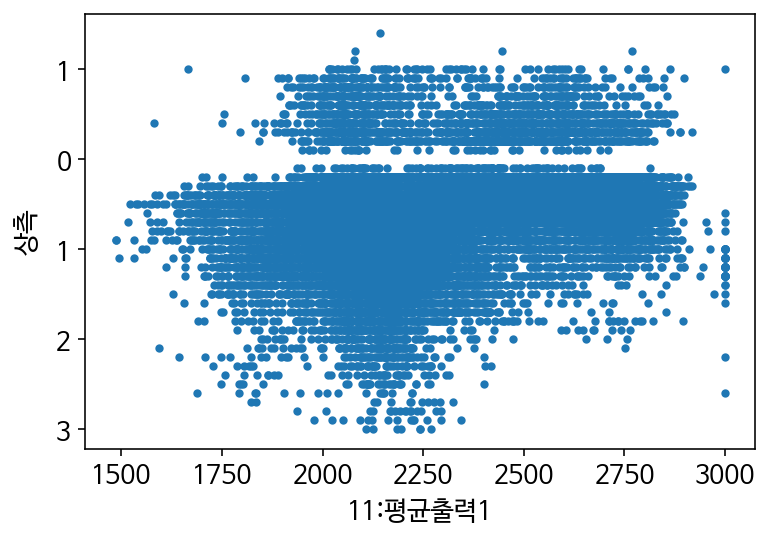

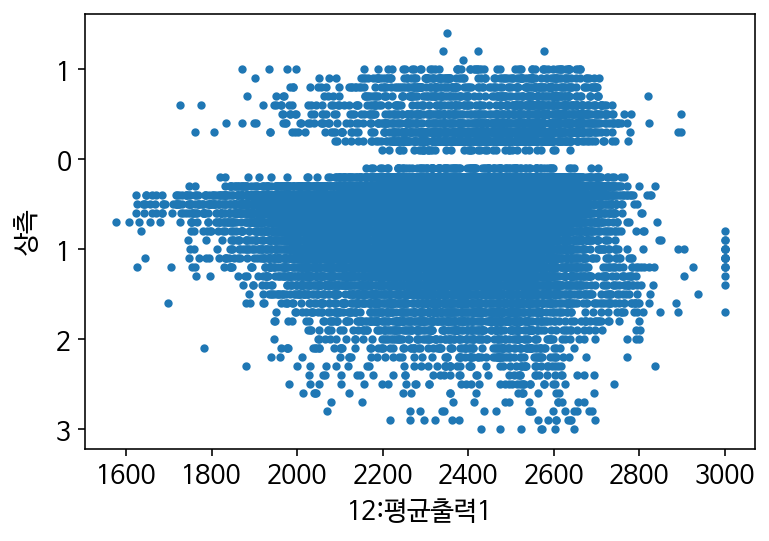

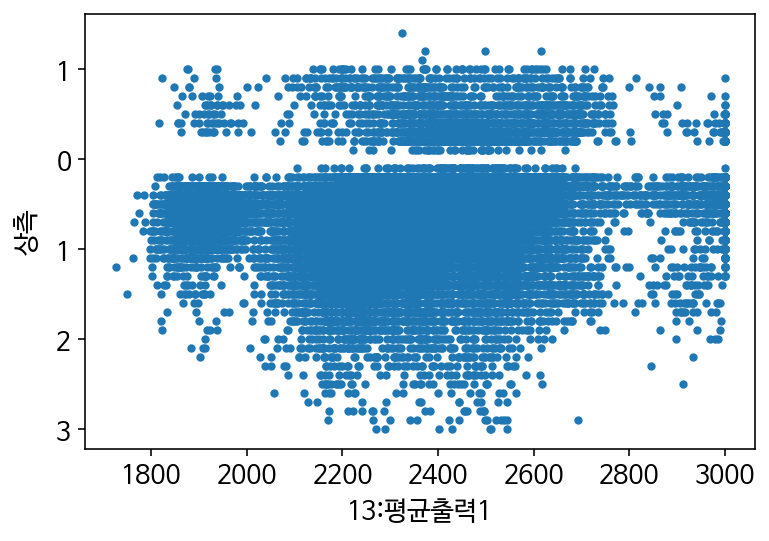

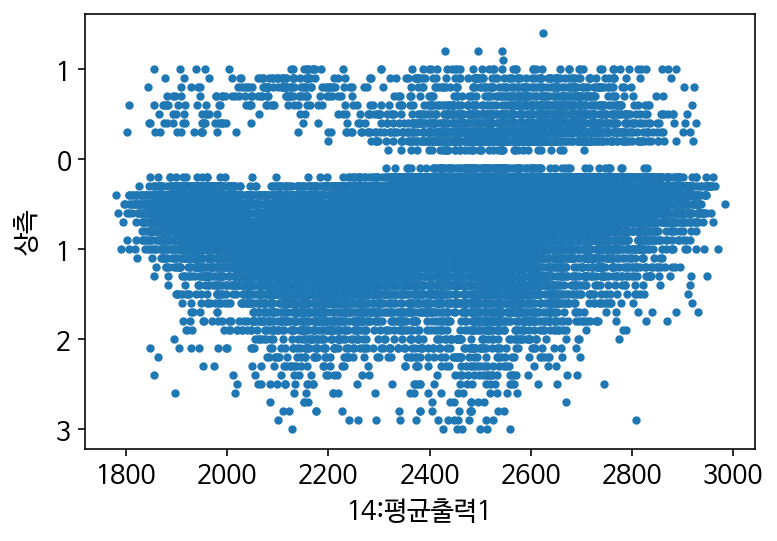

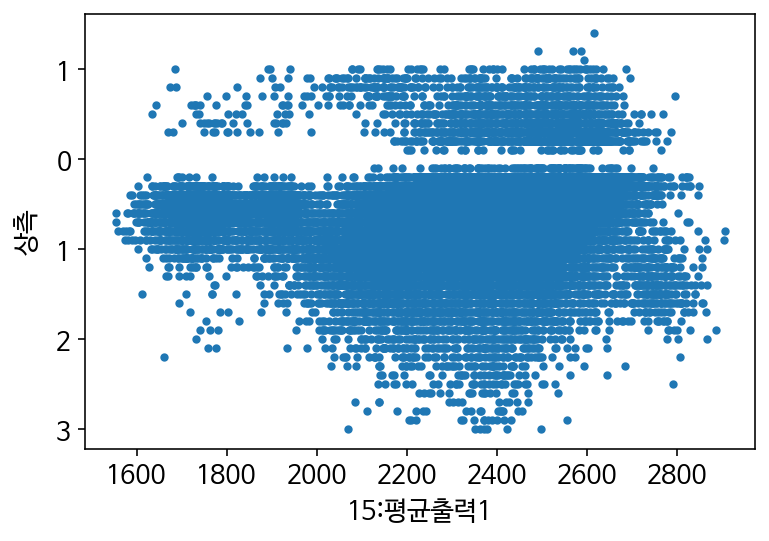

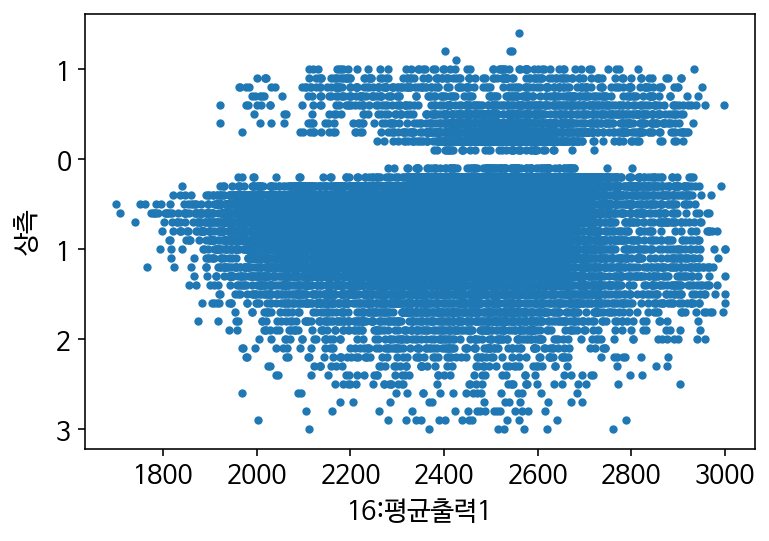

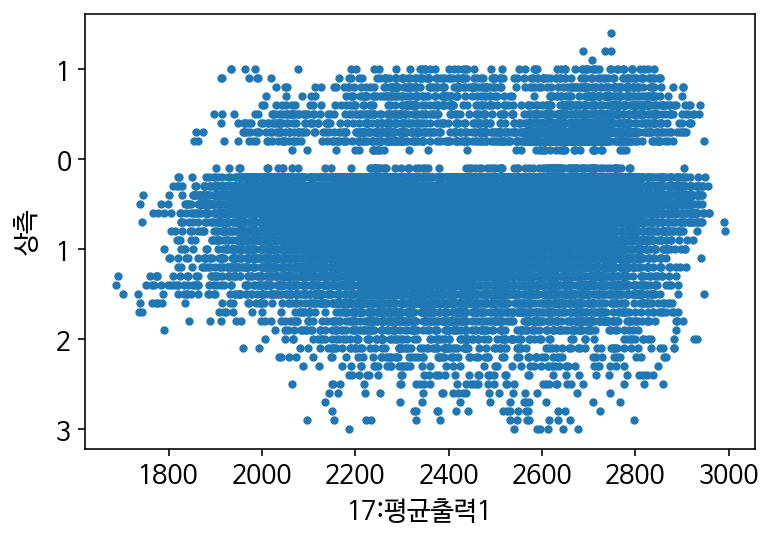

In [27]:
for col in ["11:평균출력1", "12:평균출력1","13:평균출력1","14:평균출력1","15:평균출력1", "16:평균출력1","17:평균출력1"]:
    plt.scatter(df4[col] , df4['상측'], s=10)
 #   plt('font','Arial Narrow',size=10)
    plt.ylabel('상측')
    plt.xlabel(col)
    plt.show()

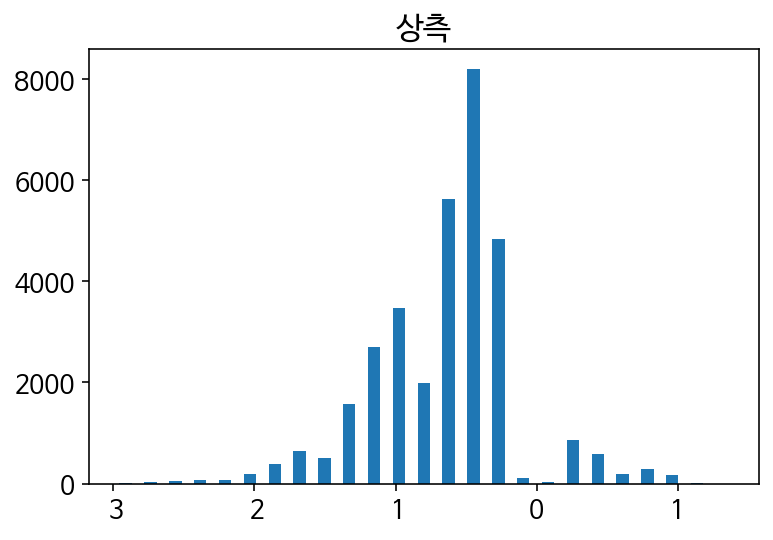

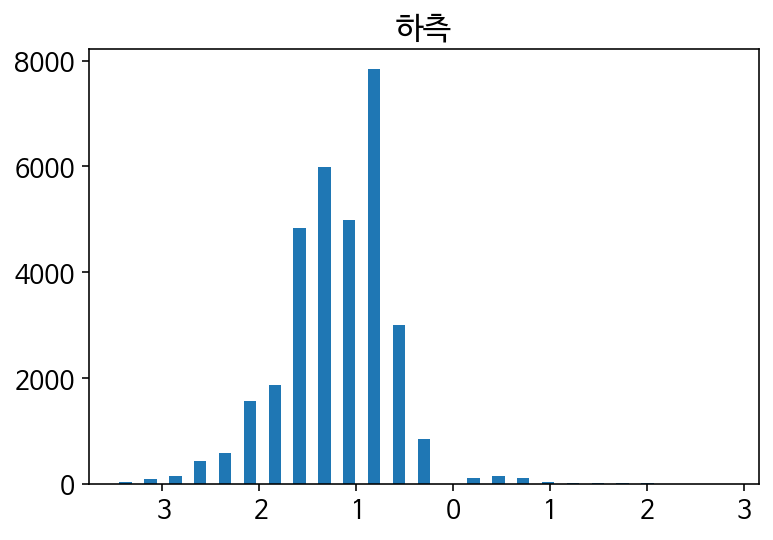

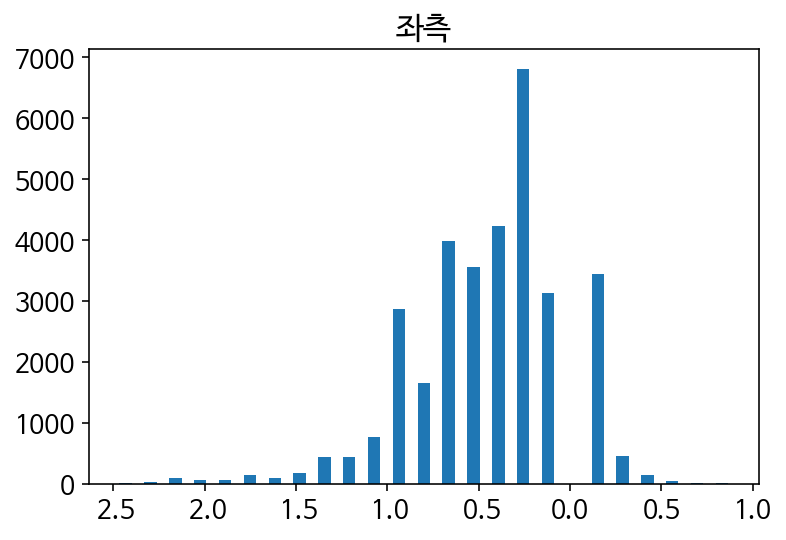

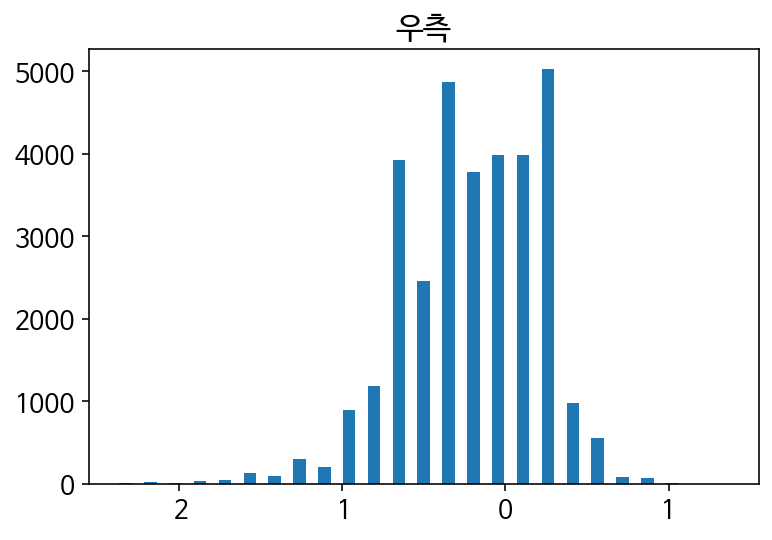

In [28]:
for col in ["상측","하측","좌측","우측"]:
    plt.hist(df4[col], bins=25, rwidth=0.5)
    plt.title(col)
    plt.show()

In [29]:
df4

,라인,생성일시,바코드,1:에너지,1:최대출력,1:평균출력 관리범위,1:평균출력1,2:에너지,2:최대출력,2:평균출력 관리범위,2:평균출력1,3:에너지,3:최대출력,3:평균출력 관리범위,3:평균출력1,4:에너지,4:최대출력,4:평균출력 관리범위,4:평균출력1,5:에너지,5:최대출력,5:평균출력 관리범위,5:평균출력1,6:에너지,6:최대출력,6:평균출력 관리범위,6:평균출력1,7:에너지,7:최대출력,7:평균출력 관리범위,7:평균출력1,8:평균출력 관리범위,9:평균출력 관리범위,10:평균출력 관리범위,11:에너지,11:최대출력,11:평균출력 관리범위,11:평균출력1,12:에너지,12:최대출력,12:평균출력 관리범위,12:평균출력1,13:에너지,13:최대출력,13:평균출력 관리범위,13:평균출력1,14:에너지,14:최대출력,14:평균출력 관리범위,14:평균출력1,15:에너지,15:최대출력,15:평균출력 관리범위,15:평균출력1,16:에너지,16:최대출력,16:평균출력 관리범위,16:평균출력1,17:에너지,17:최대출력,17:평균출력 관리범위,17:평균출력1,18:평균출력 관리범위,19:평균출력 관리범위,20:평균출력 관리범위,1:시간.1,1:진폭.1,1:주파수.1,1:에너지.1,1:최대출력.1,1:평균출력 관리범위.1,1:평균출력1.1,2:시간.1,2:진폭.1,2:주파수.1,2:에너지.1,2:최대출력.1,2:평균출력 관리범위.1,2:평균출력1.1,3:시간.1,3:진폭.1,3:주파수.1,3:에너지.1,3:최대출력.1,3:평균출력 관리범위.1,3:평균출력1.1,4:시간.1,4:진폭.1,4:주파수.1,4:에너지.1,4:최대출력.1,4:평균출력 관리범위.1,4:평균출력1.1,5:평균출력 관리범위.1,6:평균출력 관리범위.1,7:시간.1,7:진폭.1,7:주파수.1,7:에너지.1,7:최대출력.1,7:평균출력 관리범위.1,7:평균출력1.1,8:시간.1,8:진폭.1,8:주파수.1,8:에너지.1,8:최대출력.1,8:평균출력 관리범위.1,8:평균출력1.1,9:시간.1,9:진폭.1,9:주파수.1,9:에너지.1,9:최대출력.1,9:평균출력 관리범위.1,9:평균출력1.1,10:시간.1,10:진폭.1,10:주파수.1,10:에너지.1,10:최대출력.1,10:평균출력 관리범위.1,10:평균출력1.1,11:평균출력 관리범위.1,12:평균출력 관리범위.1,종합판정,상측,판정,하측,판정.1,좌측,판정.2,우측,판정.3
0,2,2022-10-04 8:18,SACQ30454509KTS2O42002,4508.0,2520.0,1100 ~ 3100,2247.0,3088.0,1641.0,1100 ~ 3100,1544.0,3092.0,1627.0,1100 ~ 3100,1578.0,3022.0,1581.0,1100 ~ 3100,1540.0,3001.0,1605.0,1100 ~ 3100,1469.0,4037.0,2261.0,1100 ~ 3100,1968.0,4361.0,2585.0,1100 ~ 3100,2235.0,1100 ~ 3100,1100 ~ 3100,40 ~ 250,4040.0,2187.0,1300 ~ 3100,2110.0,3742.0,2044.0,1300 ~ 3100,2005.0,3614.0,1975.0,1300 ~ 3100,1855.0,3963.0,2046.0,1300 ~ 3100,2009.0,3724.0,1931.0,1300 ~ 3100,1877.0,4488.0,2259.0,1300 ~ 3100,2231.0,4555.0,2381.0,1300 ~ 3100,2263.0,1600 ~ 3100,1600 ~ 3100,40 ~ 250,2.1,81.0,15.03,4925.0,2503.0,1300 ~ 3100,2351.0,2.0,78.0,15.00,4931.0,2658.0,1300 ~ 3100,2579.0,2.0,66.0,15.03,4344.0,2323.0,1300 ~ 3100,2222.0,2.0,74.0,14.99,4263.0,2261.0,1300 ~ 3100,2207.0,2000 ~ 3100,40 ~ 3100,2.0,73.0,15.01,5805.0,2999.0,1300 ~ 3100,2739.0,2.0,72.0,14.98,4353.0,2303.0,1300 ~ 3100,2262.0,2.0,64.0,15.07,4140.0,2322.0,1300 ~ 3100,2185.0,2.0,66.0,15.00,4271.0,2252.0,1300 ~ 3100,2202.0,1800 ~ 3100,40 ~ 3100,合,-0.3,合,-1.1,合,-0.3,合,-0.7,合
1,2,2022-10-04 8:22,SACQ30454509KTS2O42004,5105.0,2989.0,1100 ~ 3100,2539.0,3643.0,2120.0,1100 ~ 3100,1889.0,3454.0,1917.0,1100 ~ 3100,1794.0,3180.0,1693.0,1100 ~ 3100,1627.0,3277.0,1826.0,1100 ~ 3100,1624.0,4377.0,2458.0,1100 ~ 3100,2254.0,4821.0,2726.0,1100 ~ 3100,2408.0,1100 ~ 3100,1100 ~ 3100,40 ~ 250,4039.0,2145.0,1300 ~ 3100,2074.0,3682.0,2040.0,1300 ~ 3100,1953.0,3744.0,2098.0,1300 ~ 3100,1880.0,3869.0,2072.0,1300 ~ 3100,2005.0,3760.0,2033.0,1300 ~ 3100,1924.0,4390.0,2289.0,1300 ~ 3100,2206.0,4705.0,2446.0,1300 ~ 3100,2366.0,1600 ~ 3100,1600 ~ 3100,40 ~ 250,2.1,81.0,15.07,4835.0,2484.0,1300 ~ 3100,2325.0,2.0,78.0,15.03,5189.0,2741.0,1300 ~ 3100,2679.0,2.0,66.0,15.07,4332.0,2330.0,1300 ~ 3100,2250.0,2.0,74.0,15.02,4411.0,2426.0,1300 ~ 3100,2353.0,2000 ~ 3100,40 ~ 3100,2.0,73.0,15.05,5770.0,2999.0,1300 ~ 3100,2483.0,2.0,72.0,15.04,4434.0,2431.0,1300 ~ 3100,2317.0,2.0,64.0,15.11,3862.0,2230.0,1300 ~ 3100,1998.0,2.0,66.0,15.05,4360.0,2290.0,1300 ~ 3100,2219.0,1800 ~ 3100,40 ~ 3100,合,-0.3,合,-1.1,合,-0.4,合,-0.7,合
2,2,2022-10-04 8:25,SACQ30454509KTS2O42006,5038.0,2965.0,1100 ~ 3100,2571.0,3537.0,2059.0,1100 ~ 3100,1808.0,3623.0,1892.0,1100 ~ 3100,1821.0,3201.0,1745.0,1100 ~ 3100,1681.0,3296.0,1996.0,1100 ~ 3100,1678.0,4240.0,2334.0,1100 ~ 3100,2180.0,4727.0,2891.0,1100 ~ 3100,2367.0,1100 ~ 3100,1100 ~ 3100,40 ~ 250,3938.0,2078.0,1300 ~ 3100,2012.0,3865.0,2118.0,1300 ~ 3100,2084.0,3630.0,1993.0,1300 ~ 3100,1853.0,3972.0,2158.0,1300 ~ 3100,2101.0,3758.0,2037.0,1300 ~ 3100,1983.0,4409.0,2427.0,1300 ~ 3100,2308.0,4750.0,2434.0,1300 ~ 3100,2404.0,1600 ~ 3100,1600 ~ 3100,40 ~ 250,2.1,81.0,15.07,4870.0,2542.0,1300 ~ 3100,2386.0,2.0,78.0,15.04,5045.0,2740.0,1300 ~ 3100,2615.0,2.0,66.0,15.07,4206.0,2291.0,1300 ~ 3100,2209.0,2.0,74.0,15.02,4491.0,2363.0,1300 ~ 3100,229

In [30]:
## 훈련 데이터와 검증 데이터 준비

features = df4.columns.difference(["라인", "생성일시", "바코드","종합판정", "판정", "하측", "판정.1", "좌측", "판정.2", "우측", "판정.3","상측",
'8:에너지', '8:최대출력', '8:평균출력1', '9:에너지', '9:최대출력',
       '9:평균출력1', '10:에너지', '10:최대출력', '10:평균출력1', '11:에너지', '11:최대출력',
      '12:에너지', '12:최대출력','13:에너지', '13:최대출력',
       '14:에너지', '14:최대출력', '15:에너지', '15:최대출력',
        '16:에너지', '16:최대출력', '17:에너지', '17:최대출력',
       '18:에너지', '18:최대출력', '18:평균출력1', '19:에너지', '19:최대출력',
       '19:평균출력1', '20:에너지', '20:최대출력', '20:평균출력1',
       '1:에너지', '2:에너지', '3:에너지', 
       '4:에너지', '5:에너지',  '6:에너지',
       '7:에너지', '10:시간.1', '10:에너지.1', '10:주파수.1', '10:진폭.1', '10:최대출력.1',
       '10:평균출력 관리범위', '10:평균출력 관리범위.1', '10:평균출력1.1', '11:평균출력 관리범위',
       '11:평균출력 관리범위.1', '12:평균출력 관리범위', '12:평균출력 관리범위.1', '13:평균출력 관리범위',
       '14:평균출력 관리범위', '15:평균출력 관리범위', '16:평균출력 관리범위', '17:평균출력 관리범위',
       '18:평균출력 관리범위', '19:평균출력 관리범위', '1:시간.1', '1:에너지.1', '1:주파수.1',
       '1:진폭.1', '1:최대출력.1', '1:평균출력 관리범위', '1:평균출력 관리범위.1',
       '1:평균출력1.1', '20:평균출력 관리범위', '2:시간.1', '2:에너지.1', '2:주파수.1', '2:진폭.1',
       '2:최대출력.1', '2:평균출력 관리범위', '2:평균출력 관리범위.1', '2:평균출력1.1',
       '3:시간.1', '3:에너지.1', '3:주파수.1', '3:진폭.1', '3:최대출력.1',
       '3:평균출력 관리범위', '3:평균출력 관리범위.1', '3:평균출력1.1', '4:시간.1', '4:에너지.1',
       '4:주파수.1', '4:진폭.1', '4:최대출력.1', '4:평균출력 관리범위',
       '4:평균출력 관리범위.1', '4:평균출력1.1', '5:평균출력 관리범위', '5:평균출력 관리범위.1',
       '6:평균출력 관리범위', '6:평균출력 관리범위.1', '7:시간.1', '7:에너지.1',
       '7:주파수.1', '7:진폭.1', '7:최대출력.1', '7:평균출력 관리범위',
       '7:평균출력 관리범위.1', '7:평균출력1.1', '8:시간.1', '8:에너지.1', '8:주파수.1', '8:진폭.1',
       '8:최대출력.1', '8:평균출력 관리범위', '8:평균출력 관리범위.1', '8:평균출력1.1', '9:시간.1',
       '9:에너지.1', '9:주파수.1', '9:진폭.1', '9:최대출력.1', '9:평균출력 관리범위',
       '9:평균출력 관리범위.1', '9:평균출력1.1','1:최대출력', '2:최대출력', '3:최대출력', '4:최대출력', '5:최대출력', '6:최대출력', '7:최대출력'])
X = df[features]
y = df["상측"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4 , random_state=9, shuffle=True)

In [31]:
features

Index(['11:평균출력1', '12:평균출력1', '13:평균출력1', '14:평균출력1', '15:평균출력1', '16:평균출력1',
       '17:평균출력1', '1:평균출력1', '2:평균출력1', '3:평균출력1', '4:평균출력1', '5:평균출력1',
       '6:평균출력1', '7:평균출력1'],
      dtype='object')

In [32]:
X_train.shape, X_test.shape

((25718, 14), (17146, 14))

In [33]:
# check data types in X_train

X_train.dtypes

11:평균출력1    int64
12:평균출력1    int64
13:평균출력1    int64
14:평균출력1    int64
15:평균출력1    int64
16:평균출력1    int64
17:평균출력1    int64
1:평균출력1     int64
2:평균출력1     int64
3:평균출력1     int64
4:평균출력1     int64
5:평균출력1     int64
6:평균출력1     int64
7:평균출력1     int64
dtype: object

In [34]:
y_train.dtypes

dtype('float64')

In [35]:
X_train.isnull().sum()

11:평균출력1    0
12:평균출력1    0
13:평균출력1    0
14:평균출력1    0
15:평균출력1    0
16:평균출력1    0
17:평균출력1    0
1:평균출력1     0
2:평균출력1     0
3:평균출력1     0
4:평균출력1     0
5:평균출력1     0
6:평균출력1     0
7:평균출력1     0
dtype: int64

In [36]:
X_train.sort_values(by='11:평균출력1',ascending=False)

,11:평균출력1,12:평균출력1,13:평균출력1,14:평균출력1,15:평균출력1,16:평균출력1,17:평균출력1,1:평균출력1,2:평균출력1,3:평균출력1,4:평균출력1,5:평균출력1,6:평균출력1,7:평균출력1
28323,2999,2559,2562,2725,2503,2687,2369,1653,1656,1788,1392,1984,1819,2054
28337,2999,2653,2569,2843,2601,2705,2468,1600,1568,1264,1568,1803,1745,2043
28334,2999,2659,2556,2837,2515,2680,2475,1644,1625,1711,1461,1819,1794,2096
28297,2999,2519,2519,2625,2548,2556,2436,1568,1666,1662,1384,1691,1827,2050
28342,2999,2626,2502,2769,2547,2689,2482,1456,1473,1518,1464,1441,1748,1924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36220,0,0,0,0,0,0,0,0,0,0,0,0,0,0
40703,0,0,0,0,0,0,0,0,0,0,0,0,0,0
37482,0,0,0,0,0,0,0,0,0,0,0,0,0,0
36334,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [37]:
X_train = X_train.drop(index=[36220,40703,37482,36334,31544,9813,34289, 26478, 35334, 32931])
y_train = y_train.drop(index=[36220,40703,37482,36334,31544,9813,34289, 26478, 35334, 32931])

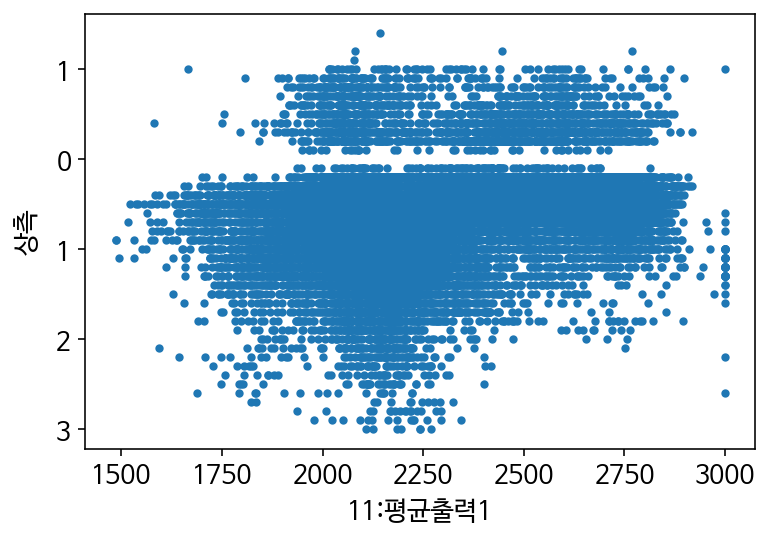

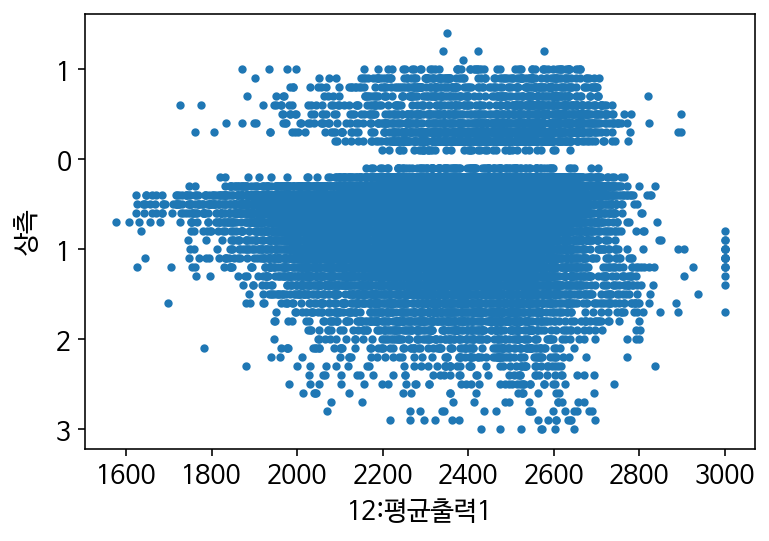

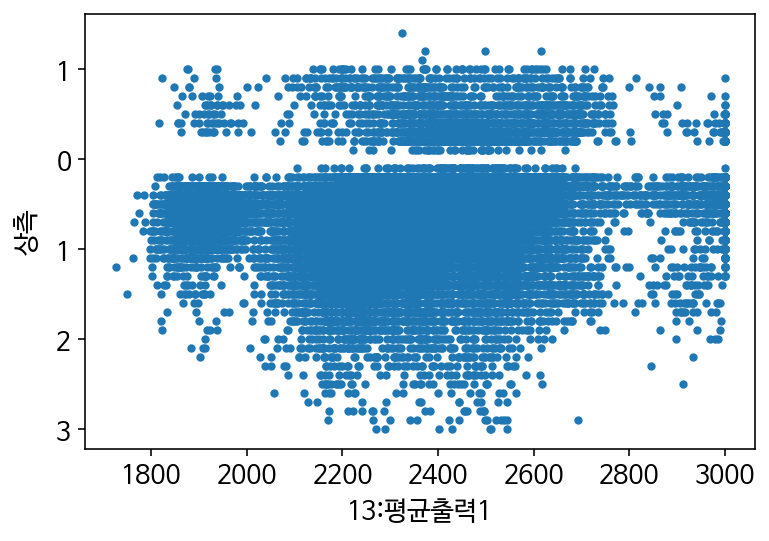

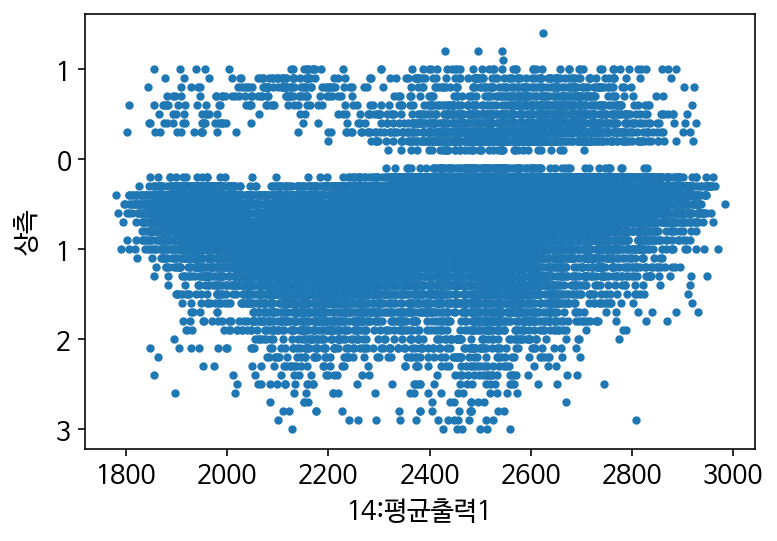

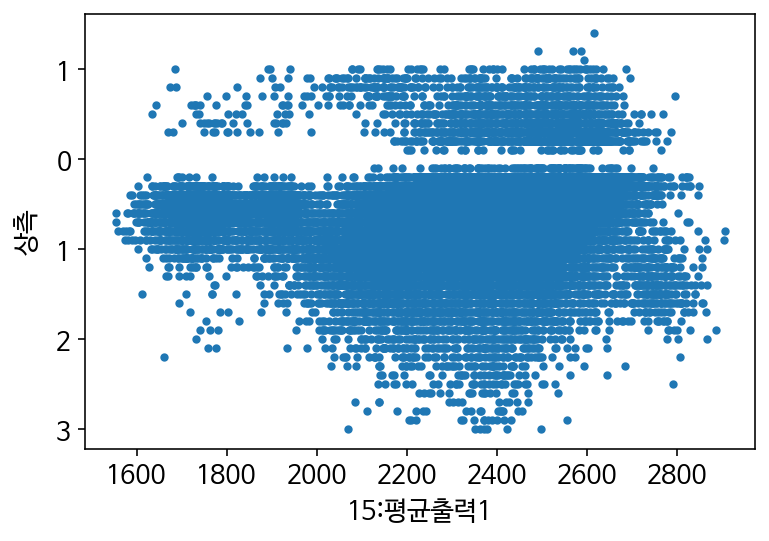

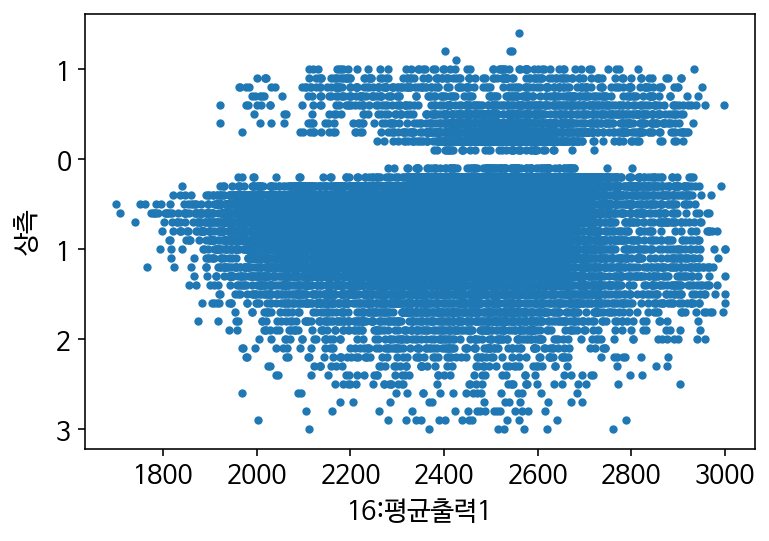

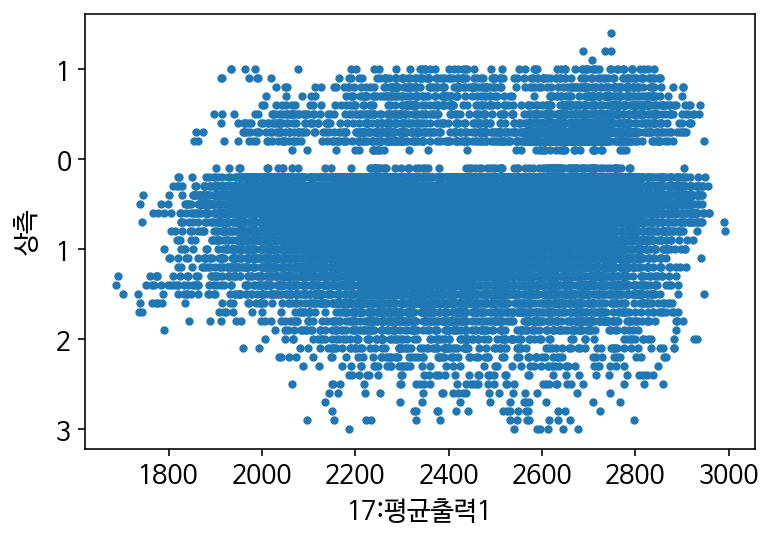

In [38]:
for col in ["11:평균출력1", "12:평균출력1","13:평균출력1","14:평균출력1","15:평균출력1", "16:평균출력1","17:평균출력1"]:
    plt.scatter(df4[col] , df4['상측'], s=10)
 #   plt('font','Arial Narrow',size=10)
    plt.ylabel('상측')
    plt.xlabel(col)
    plt.show()

In [39]:
X_train.sort_values(by='11:평균출력1',ascending=False)

,11:평균출력1,12:평균출력1,13:평균출력1,14:평균출력1,15:평균출력1,16:평균출력1,17:평균출력1,1:평균출력1,2:평균출력1,3:평균출력1,4:평균출력1,5:평균출력1,6:평균출력1,7:평균출력1
28334,2999,2659,2556,2837,2515,2680,2475,1644,1625,1711,1461,1819,1794,2096
28322,2999,2680,2548,2831,2480,2666,2483,1759,1659,1626,1513,1913,1731,2086
28314,2999,2408,2513,2732,2512,2646,2372,1636,1692,1750,1510,1898,1825,2098
28337,2999,2653,2569,2843,2601,2705,2468,1600,1568,1264,1568,1803,1745,2043
28342,2999,2626,2502,2769,2547,2689,2482,1456,1473,1518,1464,1441,1748,1924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31890,0,0,0,0,0,0,0,0,0,0,0,0,0,0
34907,0,0,0,0,0,0,0,0,0,0,0,0,0,0
28435,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20037,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [40]:
y_train.sort_values(ascending=False)

37823    1.4
40310    1.2
37824    1.2
35955    1.2
22531    1.2
        ... 
6689    -3.0
8034    -3.0
7880    -3.0
10873   -3.0
8035    -3.0
Name: 상측, Length: 25708, dtype: float64

In [41]:
X_test = X_test.fillna(X_train.mean())

depth:  8 , R-squared:  0.3461


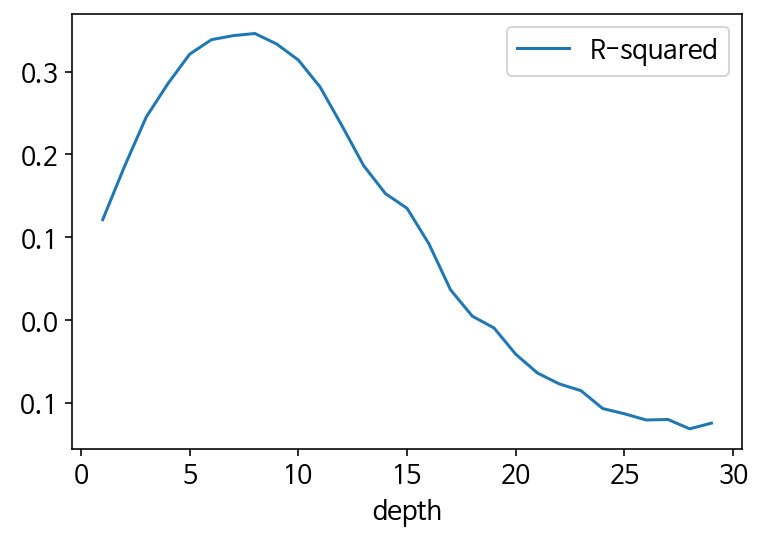

In [42]:
## 결정 트리를 이용한 회귀 예측

# 최적의 트리 깊이 (max_depth)를 실험으로 찾는다
res = []
for depth in range(1,30):
    dtr = DecisionTreeRegressor(max_depth=depth) 
    dtr.fit(X_train, y_train) 
    res.append((depth, dtr.score(X_test, y_test).round(4))) 

df_res = pd.DataFrame(res, columns=['depth','R-squared']).set_index('depth')
print('depth: ',df_res.idxmax()[0], ', R-squared: ',df_res.max()[0])
df_res.plot()

In [43]:
def plot_feature_weight(feature, weight):
    plt.figure(figsize=(5,8))
    W = pd.DataFrame({'feature':feature,'weight':weight})
    W.sort_values('weight', inplace=True)
    plt.barh(W.feature, W.weight)

In [44]:
def show_reg_result(y_test,y_pred):
    print("Max Error: ", 
      round(np.abs(y_test - y_pred).max(),3))
    print("Mean Absolute Error: ", 
      round(np.abs(y_test-y_pred).mean(),3))
    print("Root Mean Squared Error: ", 
      mean_squared_error(y_test,y_pred, squared=False).round(3))
    print("R-Squared: ", 
      r2_score(y_test, y_pred).round(3))

Max Error:  2.725
Mean Absolute Error:  0.266
Root Mean Squared Error:  0.402
R-Squared:  0.348


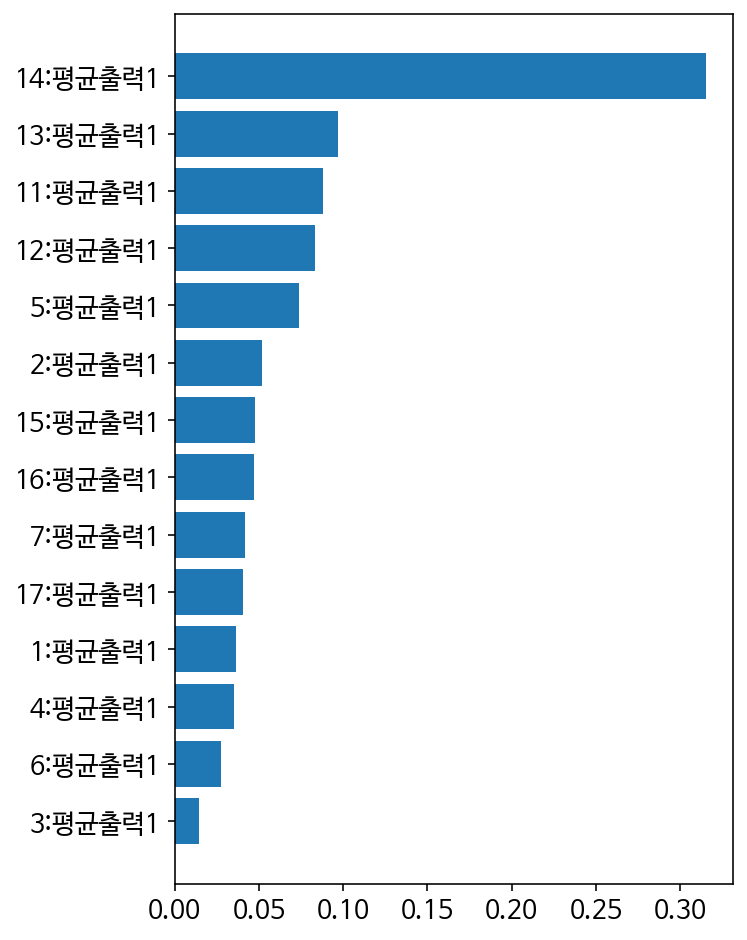

In [45]:
## 결정 트리 모델 성능 확인

dtr = DecisionTreeRegressor(max_depth=8)
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)
show_reg_result(y_test,y_pred)

plot_feature_weight(X.columns, dtr.feature_importances_)

depth:  27 , R-squared:  0.4664


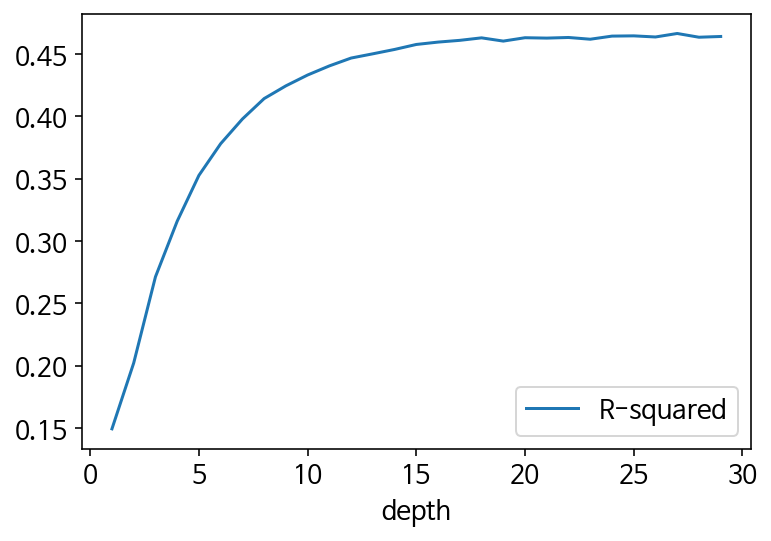

In [46]:
## 랜덤 포레스트를 이용한 회귀 예측

# 최적의 트리 깊이 (max_depth)를 실험으로 찾는다
res = []
for depth in range(1,30):
    rfr = RandomForestRegressor(max_depth=depth) 
    rfr.fit(X_train, y_train) 
    res.append((depth, rfr.score(X_test, y_test).round(4))) 

df_res = pd.DataFrame(res, columns=['depth','R-squared']).set_index('depth')
print('depth: ',df_res.idxmax()[0], ', R-squared: ',df_res.max()[0])
df_res.plot()

Max Error:  2.28
Mean Absolute Error:  0.238
Root Mean Squared Error:  0.365
R-Squared:  0.461


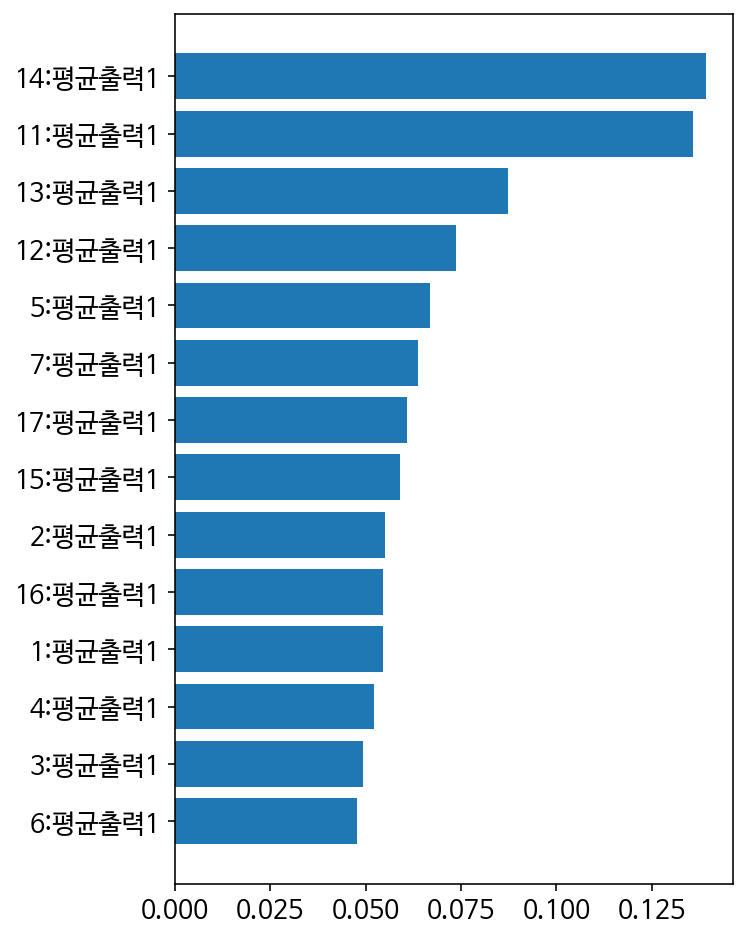

In [47]:
## 랜덤 포레스트 모델 성능 확인

rfr = RandomForestRegressor(max_depth=18)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
show_reg_result(y_test,y_pred)

plot_feature_weight(X.columns, rfr.feature_importances_)

depth:  6 , R-squared:  0.4421


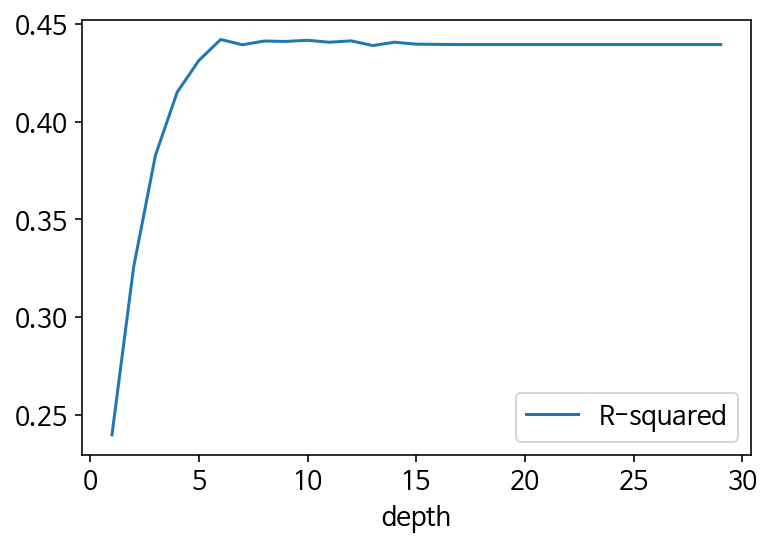

In [48]:
## LightGBM 부스팅 모델을 이용한 회귀 예측

# 최적의 트리 깊이 (max_depth)를 실험으로 찾는다
res = []
for depth in range(1,30):
    lgbm_r = LGBMRegressor(max_depth=depth, num_leaves=32) 
    lgbm_r.fit(X_train, y_train, eval_set=(X_test, y_test), 
           early_stopping_rounds=5, verbose=False)
    res.append((depth, lgbm_r.score(X_test, y_test).round(4))) 

df_res = pd.DataFrame(res, columns=['depth','R-squared']).set_index('depth')
print('depth: ',df_res.idxmax()[0], ', R-squared: ',df_res.max()[0])
df_res.plot()

Max Error:  2.282
Mean Absolute Error:  0.246
Root Mean Squared Error:  0.372
R-Squared:  0.439


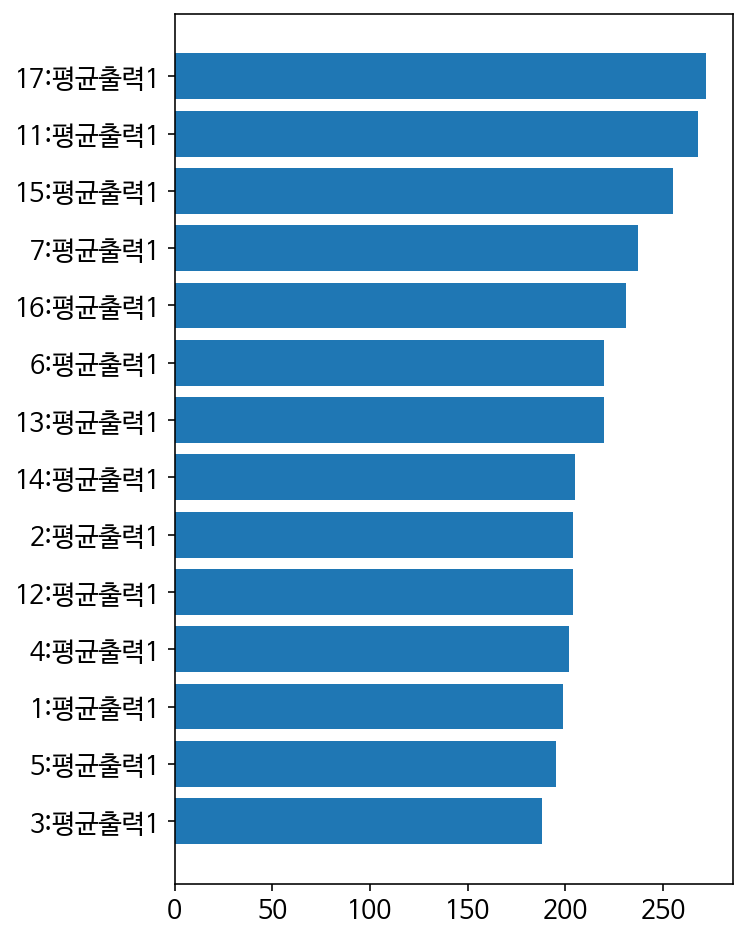

In [49]:
## 부스팅 모델 성능 확인

lgbm_r = LGBMRegressor(max_depth=19, num_leaves=32)
lgbm_r.fit(X_train, y_train, eval_set=(X_test, y_test), 
           early_stopping_rounds=5, verbose=False)
y_pred = lgbm_r.predict(X_test)
show_reg_result(y_test,y_pred)

plot_feature_weight(X.columns, lgbm_r.feature_importances_)

In [50]:
y_test

13406   -0.6
2847    -0.8
6558    -0.8
4334    -0.5
8178     0.4
        ... 
21225   -1.1
19092   -0.3
27344    0.0
35199   -0.7
17724   -1.1
Name: 상측, Length: 17146, dtype: float64

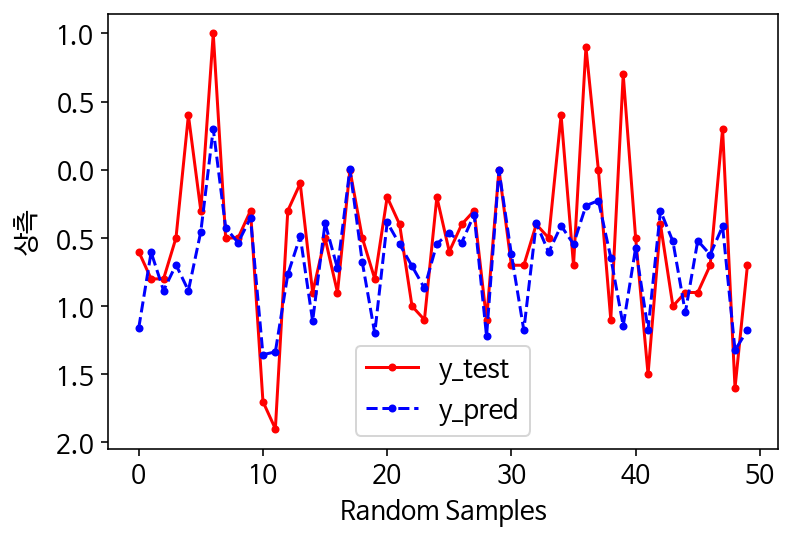

In [51]:
## 회귀 예측과 실제값 샘플 비교하기

def plot_reg_result(y_test, y_pred, N=50):
    y_test = y_test.values
    plt.plot(y_test[:N], 'r.-', label='y_test')
    plt.plot(y_pred[:N], 'b.--', label='y_pred')
    plt.legend()
    plt.xlabel("Random Samples")
    plt.ylabel("상측")
    plt.show()

y_pred = lgbm_r.predict(X_test)
plot_reg_result(y_test, y_pred)